In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
selected_features = df[['koi_prad', 'koi_impact', 'koi_time0bk', 'koi_model_snr', 'koi_depth', 'koi_fpflag_ss', 'koi_srad', 'koi_insol', 'koi_slogg', 'koi_kepmag']]
selected_features.head()

,koi_prad,koi_impact,koi_time0bk,koi_model_snr,koi_depth,koi_fpflag_ss,koi_srad,koi_insol,koi_slogg,koi_kepmag
0,2.83,0.586,162.513840,25.8,874.8,0,0.927,9.11,4.467,15.347
1,14.60,0.969,175.850252,76.3,10829.0,1,0.868,39.30,4.544,15.436
2,33.46,1.276,170.307565,505.6,8079.2,1,0.791,891.96,4.564,15.597
3,2.75,0.701,171.595550,40.9,603.3,0,1.046,926.16,4.438,15.509
4,2.77,0.762,172.979370,40.2,686.0,0,0.972,427.65,4.486,15.714


In [4]:
X = selected_features
y = df['koi_disposition']


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

for k in range(1, 60, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.577
k: 3, Train/Test Score: 0.778/0.600
k: 5, Train/Test Score: 0.729/0.608
k: 7, Train/Test Score: 0.710/0.600
k: 9, Train/Test Score: 0.693/0.593
k: 11, Train/Test Score: 0.687/0.597
k: 13, Train/Test Score: 0.678/0.590
k: 15, Train/Test Score: 0.665/0.594
k: 17, Train/Test Score: 0.659/0.594
k: 19, Train/Test Score: 0.659/0.592
k: 21, Train/Test Score: 0.656/0.599
k: 23, Train/Test Score: 0.653/0.598
k: 25, Train/Test Score: 0.655/0.597
k: 27, Train/Test Score: 0.651/0.598
k: 29, Train/Test Score: 0.645/0.601
k: 31, Train/Test Score: 0.645/0.598
k: 33, Train/Test Score: 0.649/0.603
k: 35, Train/Test Score: 0.649/0.604
k: 37, Train/Test Score: 0.643/0.606
k: 39, Train/Test Score: 0.645/0.602
k: 41, Train/Test Score: 0.644/0.602
k: 43, Train/Test Score: 0.643/0.607
k: 45, Train/Test Score: 0.645/0.606
k: 47, Train/Test Score: 0.642/0.613
k: 49, Train/Test Score: 0.641/0.609
k: 51, Train/Test Score: 0.642/0.612
k: 53, Train/Test Score: 0.639/0.610
k: 55,

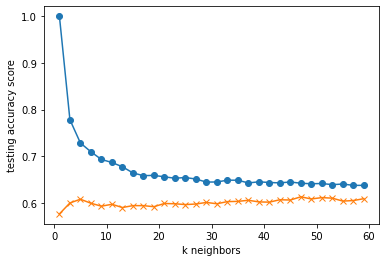

In [10]:
plt.plot(range(1, 60, 2), train_scores, marker='o')
plt.plot(range(1, 60, 2), test_scores, marker='x')
plt.xlabel("k neighbors")
plt.ylabel("testing accuracy score")
plt.show()

In [12]:
knn = KNeighborsClassifier(n_neighbors=47)
knn.fit(X_train_scaled, y_train)
print('k=47 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=47 Test Acc: 0.613


In [14]:
import joblib
filename = 'model_saves/knn_exoplanet.sav'
joblib.dump(knn, filename)

['model_saves/knn_exoplanet.sav']